In [1]:
# Collect historical data of SMA, MACD, Forward P/E, Put/Call ratio, EPS Growth Rate, and Inflation price adjustment

In [2]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pandas import DataFrame, read_csv
from pandas.plotting import register_matplotlib_converters
import csv
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd #this is how we usually import pandas
import os

In [11]:
class TechnicalIndicators:
    def __init__(self):
        self.api_key="P3J00FTHNPTSJNO4"
        self.stock_name=self.question()
        self.macd_data=self.macd()
        self.rsi_data=self.rsi()
        self.bbands_data=self.bbands()
        self.close_data=self.close()
        self.sma_data=self.sma()
    def question(self):
        stock_name="AAPL"
        return stock_name
    def macd(self):
        a = TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data=a.get_macd(symbol=self.stock_name,interval='daily')
        return data
    def rsi(self):
        b=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data = b.get_rsi(symbol=self.stock_name,interval='daily',time_period=14)
        return data
    def bbands (self):
        c=TechIndicators(key=self.api_key,output_format='pandas')
        data,meta_data=c.get_bbands(symbol=self.stock_name)
        return data
    def sma(self):
        d= TechIndicators(key=self.api_key, output_format='pandas')
        data, meta_data = d.get_sma(symbol=self.stock_name,time_period=50)
        return data
    def close(self):
        d=TimeSeries(key=self.api_key,output_format='pandas')
        data,meta_data=d.get_daily(symbol=self.stock_name,outputsize='full')
        return data

C:\Users\Eazy\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


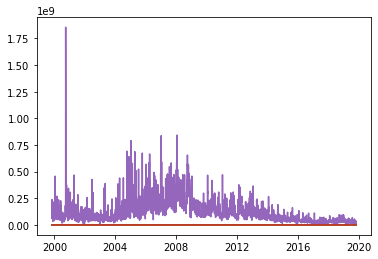

In [4]:
#Plot Closing price data
if __name__ == "__main__":
    TI=TechnicalIndicators()
    close_data = TI.close_data
    plt.plot(close_data)
    plt.show()


In [5]:
#Price data in row/column form
df = pd.DataFrame(data = close_data)
df

1. open   2. high    3. low  4. close    5. volume
date                                                           
1999-11-01   80.0000   80.6880   77.3750    77.625   69644400.0
1999-11-02   78.0000   81.6880   77.3130    80.250   99808800.0
1999-11-03   81.6250   83.2500   81.0000    81.500   82115600.0
1999-11-04   82.0630   85.3750   80.6250    83.625   94771600.0
1999-11-05   84.6250   88.3750   84.0000    88.313  104202000.0
1999-11-08   87.7500   97.7340   86.7500    96.375  237731200.0
1999-11-09   94.3712   94.5000   88.0000    89.625  202294400.0
1999-11-10   88.2500   93.2500   88.1250    91.438  144474400.0
1999-11-11   91.5940   92.6250   89.8750    92.250   67468800.0
1999-11-12   91.9380   92.0000   87.3738    90.625   69764800.0
1999-11-15   89.6250   92.8750   88.5000    89.438   64976800.0
1999-11-16   89.9918   91.7500   88.5000    91.188   58464000.0
1999-11-17   90.6880   94.7500   90.0000    90.250   91142800.0
1999-11-18   91.0630   91.1250   88.4348    89.625   91196000.0
1999-11-19   89.5000   92.8750   88.0630    92.438   78128400.0
1999-11-22   91.7515   91.7500   89.2500    90.625   50590400.0
1999-11-23   91.7500   95.2500   88.5000    92.813  135828000.0
1999-11-24   93.0000   95.0000   91.6880    94.688   53776800.0
1999-11-26   94.7500   95.5000   94.1250    95.063   33017600.0
1999-11-29   94.2485   99.7500   93.2500    94.563  116040400.0
1999-11-30   98.1250  103.7500   97.3750    97.875  210795200.0
1999-12-01  101.0000  104.5000  100.0630   103.063  154641200.0
1999-12-02  103.1250  110.6250  101.7500   110.188  141839600.0
1999-12-03  112.1880  115.5630  111.8750   115.000  161980000.0
1999-12-06  114.5596  117.3130  111.4380   116.000  116695600.0
1999-12-07  116.5630  118.0000  114.0000   117.813  111255200.0
1999-12-08  116.2500  117.8750  109.5000   110.063  103087600.0
1999-12-09  111.0000  111.0000  100.8750   105.250  213799600.0
1999-12-10  105.3130  109.2500   99.0000   103.000  159440400.0
1999-12-13  102.3910  102.4977   98.9380    99.000  132490400.0
...              ...       ...       ...       ...          ...
2019-09-20  221.3800  222.5600  217.4700   217.730   55413100.0
2019-09-23  218.9500  219.8400  217.6500   218.720   19165500.0
2019-09-24  221.0300  222.4900  217.1900   217.680   31190800.0
2019-09-25  218.5500  221.5000  217.1400   221.030   21903400.0
2019-09-26  220.0000  220.9400  218.8300   219.890   18833500.0
2019-09-27  220.5400  220.9600  217.2800   218.820   25352000.0
2019-09-30  220.9000  224.5800  220.7900   223.970   25977400.0
2019-10-01  225.0700  228.2200  224.2000   224.590   34805800.0
2019-10-02  223.0600  223.5800  217.9300   218.960   34612300.0
2019-10-03  218.4300  220.9600  215.1300   220.820   28606500.0
2019-10-04  225.6400  227.4900  223.8900   227.010   34619700.0
2019-10-07  226.2700  229.9300  225.8400   227.060   30576500.0
2019-10-08  225.8200  228.0600  224.3300   224.400   27955000.0
2019-10-09  227.0300  227.7900  225.6400   227.030   18692600.0
2019-10-10  227.9300  230.4400  227.3000   230.090   28253400.0
2019-10-11  232.9500  237.6400  232.3100   236.210   41698900.0
2019-10-14  234.9000  238.1300  234.6700   235.870   24106900.0
2019-10-15  236.3900  237.6500  234.8800   235.320   21840000.0
2019-10-16  233.3700  235.2400  233.2000   234.370   18475800.0
2019-10-17  235.0900  236.1500  233.5200   235.280   16896300.0
2019-10-18  234.5900  237.5800  234.2900   236.410   24358400.0
2019-10-21  237.5200  240.9900  237.3200   240.510   21811800.0
2019-10-22  241.1600  242.2000  239.6200   239.960   20573400.0
2019-10-23  242.1000  243.2400  241.2200   243.180   18957200.0
2019-10-24  244.5100  244.8000  241.8100   243.580   17318800.0
2019-10-25  243.1600  246.7300  242.8800   246.580   18330500.0
2019-10-28  247.4200  249.2500  246.7200   249.050   24112500.0
2019-10-29  248.9700  249.7500  242.5700   243.290   35660100.0
2019-10-30  244.7600  245.3000  241.2100   243.260   30950600.0
2019-10-31  247.2400  249.1700  237.2600   24

In [6]:
#Save price data to csv
df.to_csv(r'C:\Users\Eazy\Documents\CSE\CSE410\Project\Saved_CSV\Price.csv')

In [7]:
#Plot MACD data
if __name__ == "__main__":
    TI=TechnicalIndicators()
    macd_data = TI.macd_data
    plt.plot(macd_data)
    plt.show()

ValueError: Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.

In [ ]:
#Output MACD data in column/row format
df = pd.DataFrame(data = macd_data)
df

In [ ]:
#Save MACD data to csv
df.to_csv(r'C:\Users\Eazy\Documents\CSE\CSE410\Project\Saved_CSV\MACD.csv')

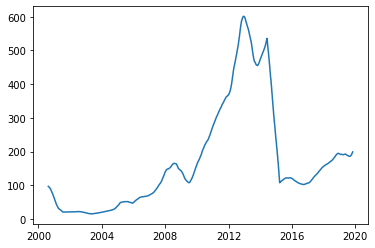

In [12]:
#Plot SMA data
if __name__ == "__main__":
    sma_data = TI.sma_data
    plt.plot(sma_data)
    plt.show()

In [13]:
#Output SMA data in column/row format
df = pd.DataFrame(data = sma_data)
df

SMA
date                         
2000-08-15 00:00:00   96.5563
2000-08-16 00:00:00   96.4107
2000-08-17 00:00:00   96.2666
2000-08-18 00:00:00   96.1091
2000-08-21 00:00:00   95.9435
2000-08-22 00:00:00   95.7604
2000-08-23 00:00:00   95.5501
2000-08-24 00:00:00   95.3825
2000-08-25 00:00:00   95.2094
2000-08-28 00:00:00   95.0384
2000-08-29 00:00:00   94.8812
2000-08-30 00:00:00   94.7316
2000-08-31 00:00:00   94.5803
2000-09-01 00:00:00   94.4462
2000-09-05 00:00:00   94.3103
2000-09-06 00:00:00   94.1403
2000-09-07 00:00:00   93.9972
2000-09-08 00:00:00   93.8275
2000-09-11 00:00:00   93.6462
2000-09-12 00:00:00   93.4597
2000-09-13 00:00:00   93.2769
2000-09-14 00:00:00   93.0718
2000-09-15 00:00:00   92.8326
2000-09-18 00:00:00   92.5850
2000-09-19 00:00:00   92.3097
2000-09-20 00:00:00   92.0349
2000-09-21 00:00:00   91.7293
2000-09-22 00:00:00   91.4399
2000-09-25 00:00:00   91.1812
2000-09-26 00:00:00   90.9233
...                       ...
2019-09-20 00:00:00  188.1379
2019-09-23 00:00:00  188.3481
2019-09-24 00:00:00  188.5629
2019-09-25 00:00:00  188.8256
2019-09-26 00:00:00  189.0770
2019-09-27 00:00:00  189.3280
2019-09-30 00:00:00  189.6023
2019-10-01 00:00:00  189.8705
2019-10-02 00:00:00  190.1380
2019-10-03 00:00:00  190.4224
2019-10-04 00:00:00  190.7271
2019-10-07 00:00:00  191.0579
2019-10-08 00:00:00  191.3957
2019-10-09 00:00:00  191.7772
2019-10-10 00:00:00  192.1935
2019-10-11 00:00:00  192.5887
2019-10-14 00:00:00  192.9873
2019-10-15 00:00:00  193.3828
2019-10-16 00:00:00  193.7659
2019-10-17 00:00:00  194.1527
2019-10-18 00:00:00  194.6238
2019-10-21 00:00:00  195.0851
2019-10-22 00:00:00  195.5452
2019-10-23 00:00:00  196.0074
2019-10-24 00:00:00  196.4587
2019-10-25 00:00:00  196.9226
2019-10-28 00:00:00  197.4064
2019-10-29 00:00:00  197.8729
2019-10-30 00:00:00  198.3238
2019-10-31 11:35:18  198.7902

[4834 rows x 1 columns]

In [14]:
#Save SMA data to csv, change 50/200 to get corresponding csv
df.to_csv(r'C:\Users\Eazy\Documents\CSE\CSE410\Project\Saved_CSV\SMA_50.csv')

In [ ]:
#Plot RSI data
if __name__ == "__main__":
    rsi_data = TI.rsi_data
    plt.plot(rsi_data)
    plt.show()

In [ ]:
#Output data in column/row format
df = pd.DataFrame(data = rsi_data)
df

In [ ]:
#Save RSI data to csv
df.to_csv(r'C:\Users\Eazy\Documents\CSE\CSE410\Project\Saved_CSV\RSI.csv')

In [ ]:
#Read EPS, P/E Ratio and ROE
Location = r'C:\Users\Eazy\Documents\CSE\CSE410\project\PE_EPS_ROE\AAPL_quarterly_financial_data.csv'
df = pd.read_csv(Location, usecols = ['Quarter end','EPS basic','P/E ratio', 'ROE'])
df

In [ ]:
df.describe() #get statistics

In [ ]:
#Read inflation rate
Location = r'C:\Users\Eazy\Documents\CSE\CSE410\project\10yr_Inflation_Rate.csv'
df = pd.read_csv(Location)
df